In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

chickwts = pd.read_csv('chickwts.csv')
chickwts

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean
...,...,...
66,359,casein
67,216,casein
68,222,casein
69,283,casein


<AxesSubplot:xlabel='feed', ylabel='weight'>

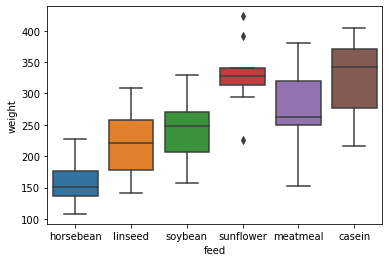

In [2]:
sns.boxplot(y='weight', x='feed', data=chickwts)

## 1-sample t-test

**Null and Alternative Hypothesis**  

$H_{0}: \mu_{soybean} = 300$  
$H_{1}: \mu_{soybean} \neq 300$

<AxesSubplot:xlabel='weight'>

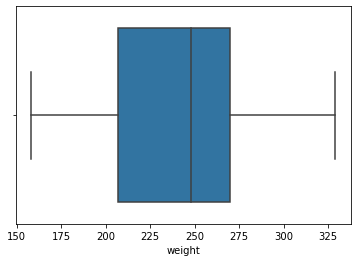

In [20]:
soybean_chickwts = chickwts.loc[chickwts.loc[:, 'feed'] == 'soybean', 'weight']

sns.boxplot(x=soybean_chickwts)

In [51]:
stats.ttest_1samp(a=soybean_chickwts, popmean=300)

Ttest_1sampResult(statistic=-3.70311068385518, pvalue=0.0026542575657835608)

The p-value is less than 5%, so we can reject the null hypothesis in favour of the alternative.

## 2 sample t-test

<AxesSubplot:xlabel='feed', ylabel='weight'>

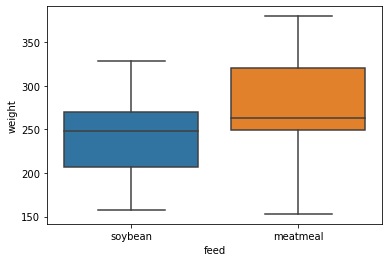

In [33]:
sns.boxplot(y='weight', x='feed', data=chickwts[chickwts['feed'].isin(['soybean', 'meatmeal'])])

**Null and Alternative Hypothesis**  

$H_{0}: \mu_{soybean} = \mu_{meatmeal}$  
$H_{1}: \mu_{soybean} \neq \mu_{meatmeal}$

In [55]:
stats.ttest_ind(
            a=chickwts.loc[chickwts.loc[:, 'feed'] == 'linseed', 'weight'],
            b=chickwts.loc[chickwts.loc[:, 'feed'] == 'meatmeal', 'weight'],
            equal_var=True
    )

Ttest_indResult(statistic=-2.377260681187378, pvalue=0.02702312877489196)

The p-value is less than 5%, so we can reject the null hypothesis in favour of the alternative.

**One-way ANOVA**  
$H_{0}: \mu_{horsebean} = \mu_{linseed} = \ldots = \mu_{casein}$  
$H_{1}: \text{Means are not all equal.}$

In [63]:
groups = []
for i in chickwts.feed.unique():
    groups.append(chickwts.loc[chickwts.loc[:, 'feed'] == i, 'weight'])

stats.f_oneway(*groups)

F_onewayResult(statistic=15.364799774712534, pvalue=5.936419853471331e-10)

Therefore probability that all group means are actually the same is extremely small.  
We can reject the null hypothesis and accept the alternative hypothesis.